## QUESTION 2

We are interested in examining the evolutionary behavior and expression patterns of two genes, GENE1 and GENE2. We have found the coordinates of both genes in the hg19 (human) and mm9 (mouse) reference assemblies. These coordinates are provided in the following bed files: 

* data/GENE1.hg19.exons.bed 
* data/GENE2.hg19.exons.bed 
* data/GENE1.mm9.exons.bed 
* data/GENE2.mm9.exons.bed 



### 2a) 
Extract the fasta DNA sequence for each human gene. Store the fasta sequences in the files: 

* data/GENE1.hg19.exons.fa
* data/GENE2.hg19.exons.fa
* data/GENE1.mm9.exons.fa  --> We have already generated this file for you. 
* data/GENE2.mm9.exons.fa --> We have already generated this file for you. 

Hint: You can find the reference hg19 assembly in /data/hg19.genome.fa

In [1]:
## BEGIN SOLUTION ## 
!fastaFromBed  -fi /users/annashch/male.hg19.fa -bed data/GENE1.hg19.exons.bed > data/GENE1.hg19.exons.fa
!fastaFromBed  -fi /users/annashch/male.hg19.fa -bed data/GENE2.hg19.exons.bed > data/GENE2.hg19.exons.fa
## END SOLUTION ## 

## 2b) 
Write a function to convert a fasta format DNA file to a file with a single string of DNA bases. 
For example: 
```    
>seq1
AAAAA
>seq2
TTTT
```
would be converted to: 
```
AAAATTTT
```

In [2]:
def fasta_to_string(input_fasta_file,output_string_file): 
## BEGIN SOLUTION 
    out_string=""
    input_fasta=open(input_fasta_file,'r').read().strip().split('\n')
    for line in input_fasta: 
        if line.startswith('>')==False:
            out_string=out_string+line
    outf=open(output_string_file,'w')
    outf.write(out_string)
    outf.close() 
## END SOLUTION 


In [3]:
fasta_to_string("data/GENE1.hg19.exons.fa","data/GENE1.hg19.exons.dna.txt")
fasta_to_string("data/GENE2.hg19.exons.fa","data/GENE2.hg19.exons.dna.txt")
fasta_to_string("data/GENE1.mm9.exons.fa","data/GENE1.mm9.exons.dna.txt")
fasta_to_string("data/GENE2.mm9.exons.fa","data/GENE2.mm9.exons.dna.txt")

#Sanity check one of the files to ensure your fasta-to-string conversion is working properly 
!cat GENE1.hg19.exons.dna.txt

TCAGTTGGGCATGGTTTCATCTGGGAAGGCCACAGACACATCTTCCACTGTGATGCTGTCCACGATGGAGGTGAGGGAGTGCAGGTTGTGGGCATCTGTAGGGTCAGCCGTGAGCAGATGATCCCTGGGTTGGCGCTGAACTCCAGTGCACTGCCCCACTCTGGACTGCAGGAGGCGCTGTGAGAGCTGCATTCGCTGGGCACCCCCTGGCTGGGGCCCGCCCCCGCCCCGGTAGCGGAGGTCACGCTCCTCCTGGTTGAGGGAGCTGAGCAGGGCCTGGAGGCGCTCGATGTACTGGATGGCACTGCGCAGGATCTCCACCTTGGGCAGCCGCTGGTTGGGGTTGAGCAGGGTGCTTCTCTTCAGGGCCTCGAAGGCCTCATTCACCTTCTTGAGCCTGCGCTTCTCCCTCAGTGTGGCCGCCCGCCGCCGGTCCACGGACACCGACTTCCTCTTACACACCTTACACGCCCACGGCAGGCACTGGCCTGGACAGTGCTCGGGGGTCCCCAGCCCCTTGTCCTCAAGGGGCCCTGGGGCCTCGGGGCTCAGGGTGAGCTCCGTCCGCTCGTAGCCTGGTGGTTCGAAGCCCTGGAGGTGGACAGGCAGGTAGTTTTCCCCATCATAGAAGCGGGGTTCCTGGTAGAAGTAGGGGGATGTCTCATACAGCTCCAT

### 2c) 
Use the helper functions we defined in class to extract the RNA sequence for each of the 4 genes. 
Hint: We have added a new function called "reverse_complement" in the central_dogma_helpers help file. This function computes the reverse complement sequence for genes on the negative strand. An example use case is below: 


In [4]:
import sys 
sys.path.append("../helpers/")
from central_dogma_helpers import * 
reverse_complement("ACT")

'AGT'

In [5]:
#Uses the variables gene1_hg19_rna, gene2_hg19_rna, gene1_mm9_rna, gene2_mm9_rna to store the RNA sequences. 
## BEGIN SOLUTION 
gene1_hg19_rna=write_RNA_from_DNA(reverse_complement(open("data/GENE1.hg19.exons.dna.txt",'r').read()))
gene2_hg19_rna=write_RNA_from_DNA(open("data/GENE2.hg19.exons.dna.txt",'r').read())
gene1_mm9_rna=write_RNA_from_DNA(open("data/GENE1.mm9.exons.dna.txt",'r').read())
gene2_mm9_rna=write_RNA_from_DNA(reverse_complement(open("data/GENE2.mm9.exons.dna.txt",'r').read()))
## END SOLUTION 
print(gene1_hg19_rna)


AUGGAGCUGUAUGAGACAUCCCCCUACUUCUACCAGGAACCCCGCUUCUAUGAUGGGGAAAACUACCUGCCUGUCCACCUCCAGGGCUUCGAACCACCAGGCUACGAGCGGACGGAGCUCACCCUGAGCCCCGAGGCCCCAGGGCCCCUUGAGGACAAGGGGCUGGGGACCCCCGAGCACUGUCCAGGCCAGUGCCUGCCGUGGGCGUGUAAGGUGUGUAAGAGGAAGUCGGUGUCCGUGGACCGGCGGCGGGCGGCCACACUGAGGGAGAAGCGCAGGCUCAAGAAGGUGAAUGAGGCCUUCGAGGCCCUGAAGAGAAGCACCCUGCUCAACCCCAACCAGCGGCUGCCCAAGGUGGAGAUCCUGCGCAGUGCCAUCCAGUACAUCGAGCGCCUCCAGGCCCUGCUCAGCUCCCUCAACCAGGAGGAGCGUGACCUCCGCUACCGGGGCGGGGGCGGGCCCCAGCCAGGGGGUGCCCAGCGAAUGCAGCUCUCACAGCGCCUCCUGCAGUCCAGAGUGGGGCAGUGCACUGGAGUUCAGCGCCAACCCAGGGAUCAUCUGCUCACGGCUGACCCUACAGAUGCCCACAACCUGCACUCCCUCACCUCCAUCGUGGACAGCAUCACAGUGGAAGAUGUGUCUGUGGCCUUCCCAGAUGAAACCAUGCCCAACUGA


## 2d) 
Use the helper functions we defined in class to extract the 1-letter amino acid sequence for each gene. 


In [8]:
#Uses the variables gene1_hg19_aa, gene2_hg19_aa, gene1_mm9_aa, gene2_mm9_aa to store the RNA sequences. 

## BEGIN SOLUTION ## 
gene1_hg19_aa=write_protein_1_letter_aa_from_RNA(gene1_hg19_rna)
gene2_hg19_aa=write_protein_1_letter_aa_from_RNA(gene2_hg19_rna)
gene1_mm9_aa=write_protein_1_letter_aa_from_RNA(gene1_mm9_rna)
gene2_mm9_aa=write_protein_1_letter_aa_from_RNA(gene2_mm9_rna)
## END SOLUTION 
print("gene1_hg19_aa:")
print(gene1_hg19_aa)

print("gene1_mm9_aa:")
print(gene1_mm9_aa)

print("gene2_hg19_aa")
print(gene2_hg19_aa)

print("gene2_mm9_aa")
print(gene2_mm9_aa)

gene1_hg19_aa:
MELYETSPYFYQEPRFYDGENYLPVHLQGFEPPGYERTELTLSPEAPGPLEDKGLGTPEHCPGQCLPWACKVCKRKSVSVDRRRAATLREKRRLKKVNEAFEALKRSTLLNPNQRLPKVEILRSAIQYIERLQALLSSLNQEERDLRYRGGGGPQPGGAQRMQLSQRLLQSRVGQCTGVQRQPRDHLLTADPTDAHNLHSLTSIVDSITVEDVSVAFPDETMPN*
gene1_mm9_aa:
MELYETSPYFYQEPHFYDGENYLPVHLQGFEPPGYERTELSLSPEARGPLEEKGLGTPEHCPGQCLPWACKVCKRKSVSVDRRRAATLREKRRLKKVNEAFEALKRSTLLNPNQRLPKVEILRSAIQYIERLQALLSSLNQEERDLRYRGGGGPQPMVPSECNSHSASCSPEWGNALEFGPNPGDHLLAADPTDAHNLHSLTSIVDSITVEDMSVAFPDETMPN*
gene2_hg19_aa
MDCCTENACSKPDDDILDIPLDDPGANAAAAKIQASFRGHMARKKIKSGERGRKGPGPGGPGGAGVARGGAGGGPSGD*
gene2_mm9_aa
MDCCTESACSKPDDDILDIPLDDPGANAAAAKIQASFRGHMARKKIKSGECGRKGPGPGGPGGAGGARGGAGGGPSGD*


## 2e) 

Use the pairwise2.align module to perform pairwise-sequence alignment between  gene1_hg19_aa and gene1_mm9_aa 

In [10]:
import sequence_alignment_helpers
from sequence_alignment_helpers import *
from Bio import pairwise2 

In [11]:
## BEGIN SOLUTION ## 
alignments = pairwise2.align.globalxx(gene1_hg19_aa, gene1_mm9_aa)
#uses the sequence_alignment_helper functions to print the alignments with a nice format
align1_linebreaks=insert_newlines(alignments[0][0])
align2_linebreaks=insert_newlines(alignments[0][1])
 
#format_alignment_linebreak inputs are: align1_linebreaks,align2_linebreaks,score,begin,end,seq1,seq2
print(format_alignment_linebreak(align1_linebreaks,align2_linebreaks,alignments[0][2],alignments[0][3],
                                 alignments[0][4],'gene1_hg19_aa','gene1_mm9_aa'))

## END SOLUTION ## 


gene1_hg19_aa: MELYETSPYFYQEPR-FYDGENYLPVHLQGFEPPGYERTELT-LSPEAP-
               ||||||||||||||||||||||||||||||||||||||||||||||||||
gene1_mm9_aa:  MELYETSPYFYQEP-HFYDGENYLPVHLQGFEPPGYERTEL-SLSPEA-R

gene1_hg19_aa: GPLED-KGLGTPEHCPGQCLPWACKVCKRKSVSVDRRRAATLREKRRLKK
               ||||||||||||||||||||||||||||||||||||||||||||||||||
gene1_mm9_aa:  GPLE-EKGLGTPEHCPGQCLPWACKVCKRKSVSVDRRRAATLREKRRLKK

gene1_hg19_aa: VNEAFEALKRSTLLNPNQRLPKVEILRSAIQYIERLQALLSSLNQEERDL
               ||||||||||||||||||||||||||||||||||||||||||||||||||
gene1_mm9_aa:  VNEAFEALKRSTLLNPNQRLPKVEILRSAIQYIERLQALLSSLNQEERDL

gene1_hg19_aa: RYRGGGGPQPGGAQRMQL--SQRLLQ---SRVGQ----CT----GVQRQ-
               ||||||||||||||||||||||||||||||||||||||||||||||||||
gene1_mm9_aa:  RYRGGGGPQP-----M--VPS-----ECNS----HSASC-SPEWG----N

gene1_hg19_aa: -----PR---DHLLTA-DPTDAHNLHSLTSIVDSITVEDV-SVAFPDETM
               ||||||||||||||||||||||||||||||||||||||||||||||||||
gene1_mm9_aa:  ALEFGP-NPGDHLL-AADPTDAHNLHSLTSIVDSITVED-MSVAFPDETM

gene1

## 2f) 
Use the pairwise2.align module to perform pairwise-sequence alignment between gene2_hg19_aa and gene2_mm9_aa 

In [12]:
alignments = pairwise2.align.globalxx(gene2_hg19_aa, gene2_mm9_aa)
#uses the sequence_alignment_helper functions to print the alignments with a nice format
align1_linebreaks=insert_newlines(alignments[0][0])
align2_linebreaks=insert_newlines(alignments[0][1])
 

#format_alignment_linebreak inputs are: align1_linebreaks,align2_linebreaks,score,begin,end,seq1,seq2
print(format_alignment_linebreak(align1_linebreaks,align2_linebreaks,alignments[0][2],alignments[0][3],
                                 alignments[0][4],'gene2_hg19_aa','gene2_mm9_aa'))


gene2_hg19_aa: MDCCTEN-ACSKPDDDILDIPLDDPGANAAAAKIQASFRGHMARKKIKSG
               ||||||||||||||||||||||||||||||||||||||||||||||||||
gene2_mm9_aa:  MDCCTE-SACSKPDDDILDIPLDDPGANAAAAKIQASFRGHMARKKIKSG

gene2_hg19_aa: ER-GRKGPGPGGPGGAGV-ARGGAGGGPSGD*
               ||||||||||||||||||||||||||||||||
gene2_mm9_aa:  E-CGRKGPGPGGPGGAG-GARGGAGGGPSGD*

  Score=  76
  Begin=  0
  End  =  82
  Length= 82



## 2g) 
Which gene is more conserved between humans and mice, GENE1 or GENE2? How can you tell? 



#### BEGIN ANSWER #### 
GENE2 has a higher fraction of conserved bases. 
#### END ANSWER #### 

## QUESTION 3 

We would like to learn what organ system GENE1 and GENE2 are most highly expressed in within the mouse. To do this, we will use RNAseq data from ENCODE (http://chromosome.sdsc.edu/mouse/download.html). We have pre-processed the data into a gene expression matrix (mm9.rnaseq.fpkm.tsv) and a corresponding metadata file (mm9.rnaseq.metadata.tsv). You will use these files for question 2. 



### 3a) ###

Use the WashU browser to determine the identity of GENE1 and GENE2. Note: please report bot the common gene name and the NM_ identifier value from the mm9 genome. 



#### BEGIN ANSWER #### 
GENE1 is: MYOG (NM_031189)


GENE2 is: NRGN (NM_022029) 

#### END ANSWER ####

### 3b) ###
Read in the RNA-Seq datatable "data/mm9.rnaseq.fpkm.tsv" into a dataframe using the pandas package. Use the head command to print the first 10 lines of the dataframe.

In [14]:
# use the variable rnaseq to store the pandas dataframe
## BEGIN SOLUTION ## 
import pandas as pd 
rnaseq=pd.read_table("data/mm9.rnaseq.fpkm.tsv",header=0,index_col=0)
rnaseq.head(10)
## END SOLUTION ## 

,heart1-zy6,lung1-zy10,mESC-zy27,kidney2-zy16,placenta-2,brain-E14,heart2-zy7,cortex2-zy14,spleen2-zy9,boneMarrow2-zy26,...,mef-male1-zy17,boneMarrow1-zy24,intestine-2,lung2-zy11,liver1-zy4,spleen1-zy8,cerebellum1-zy21,olfactory-2,heart-E14,placenta-1
NM_011441,2.254890,4.336400,0.212058,0.960460,2.62398,0.51333,1.353380,0.106251,0.575847,0.297424,...,0.000000,0.039413,0.105708,4.71983,0.347552,0.689417,0.404162,0.904820,0.873090,2.19965
NM_025300,7.583560,2.323340,23.179600,4.920100,4.69549,7.34801,7.412210,3.865600,4.427460,4.581390,...,8.075880,7.392750,7.863720,1.96798,3.743500,6.701990,4.186450,5.506150,10.256600,4.17015
NM_008866,4.737040,3.832030,31.991800,23.730700,11.37850,8.60540,3.965590,3.329030,2.991480,1.626060,...,13.292800,2.053090,37.456300,4.14774,7.317360,4.670900,7.481730,8.729460,14.243400,12.58080
NM_001159750,2.079380,2.996970,21.799800,3.036960,6.05676,10.74390,1.056030,5.013350,3.505370,4.125510,...,18.337100,4.762580,3.091350,2.35791,3.647510,3.578290,4.965500,6.253020,7.277450,4.03515
NM_001159751,0.751692,0.994478,1.479500,2.558080,0.00000,4.93156,0.888016,0.851652,2.056400,2.042700,...,0.000000,0.000000,1.304400,1.59578,3.612130,3.468520,3.203380,0.000000,2.003800,2.29215
NM_133826,2.982250,6.629980,19.314400,16.499100,10.92590,19.69960,2.484040,25.558000,5.227300,3.062300,...,15.895600,3.558540,7.730220,6.73786,8.734990,6.042640,15.670900,13.058400,6.997890,11.22340
NM_009826,3.578000,4.065270,5.779170,4.129500,8.16231,9.95187,2.852720,7.387660,1.426160,2.261860,...,13.945400,2.546050,4.193170,3.48497,5.767800,2.622910,7.831170,7.165800,5.404700,7.65890
NM_173868,0.000000,0.000000,0.009436,0.000000,0.00000,6.19197,0.000000,0.867198,0.011826,0.000000,...,0.008398,0.000000,0.103478,0.00000,0.000000,0.061352,14.472800,0.429446,0.000000,0.00000
NM_183028,5.060990,5.060030,9.841090,5.117730,3.69579,8.50304,3.712660,10.124600,3.041030,1.609480,...,7.220090,2.119160,2.481150,4.04919,12.941600,4.970270,15.055100,10.796100,5.428500,3.49453
NM_027671,0.032684,0.014074,0.000000,0.012361,0.00000,1.18441,0.016036,2.877990,0.033066,0.000000,...,0.023483,0.000000,0.065757,0.00000,0.051888,0.051464,0.747692,2.176390,0.182489,0.00000


### 3c) ###

Select the row of 'mm9.rnaseq.fpkm.tsv' that has the RNA-seq data for GENE1 and select the row that has RNA-seq data for GENE2. Store these values in the variables "gene1_rnaseq" and "gene2_rnaseq". 


In [72]:
## BEGIN SOLUTION ## 
gene1_rnaseq=rnaseq.loc['NM_031189']
print(gene1_rnaseq.head())
gene2_rnaseq=rnaseq.loc['NM_022029']
print(gene2_rnaseq.head())
## END SOLUTION ## 

heart1-zy6      0.000000
lung1-zy10      0.000000
mESC-zy27       0.037373
kidney2-zy16    0.000000
placenta-2      0.000000
Name: NM_031189, dtype: float64
heart1-zy6      9.910050
lung1-zy10      3.879420
mESC-zy27       0.256668
kidney2-zy16    1.362940
placenta-2      5.811790
Name: NM_022029, dtype: float64


### 3d) ### 
Generate histograms of GENE1 and GENE2 expression across all samples in the RNA-seq dataset. You might have to experiment with different values of the "binwidth" parameter to find the one that 

In [73]:
import plotnine 
from plotnine import *

/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine-0.4.0-py3.7.egg/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: 
The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/users/annashch/miniconda3/lib/python3.7/copy.py:274: MatplotlibDeprecationWarning: 
The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine-0.4.0-py3.7.egg/plotnine/scales/scale.py:99: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine-0.4.0-py3.7.egg/plotnine/facets/facet.py:151: MatplotlibDeprecationWarning: 
The Bunch class was depr

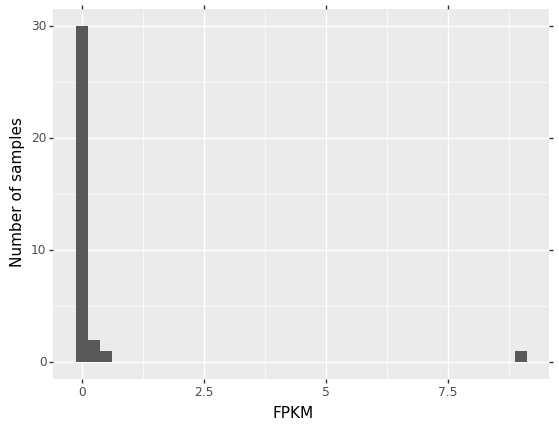

<ggplot: (8767915175642)>

In [74]:
qplot(x=gene1_rnaseq,
      geom="histogram",
      xlab="FPKM",
      ylab="Number of samples",
      binwidth=0.25)

/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine-0.4.0-py3.7.egg/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: 
The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/users/annashch/miniconda3/lib/python3.7/copy.py:274: MatplotlibDeprecationWarning: 
The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine-0.4.0-py3.7.egg/plotnine/scales/scale.py:99: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine-0.4.0-py3.7.egg/plotnine/facets/facet.py:151: MatplotlibDeprecationWarning: 
The Bunch class was depr

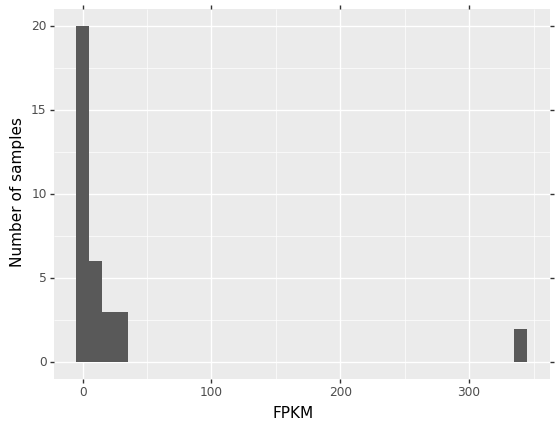

<ggplot: (8767915310326)>

In [75]:
qplot(x=gene2_rnaseq,
      geom="histogram",
      xlab="FPKM",
      ylab="Number of samples",
      binwidth=10)

### 3e) ### 
We observe some outliers in the histograms of expression for GENE1 and GENE2. Which sample has the highest expression of GENE1? Which sample has the highest expression of GENE2?

In [80]:
#Store the sample name with the highest expression of GENE1 in the variable sample1.
#Store the sample name with the higehst expression of GENE2 in the variable sample2. 
## BEGIN SOLUTION ## 
sample1=gene1_rnaseq.sort_values(ascending=False).index[0]
sample2=gene2_rnaseq.sort_values(ascending=False).index[0]
print(sample1)
print(sample2)
## END SOLUTION ## 


limb-E14
cortex1-zy13


### 3f) ###
Perform principle component analysis on the samples in the rnaseq dataframe. How much variance is explained by PC1? Generate a scree plot of the variance explained by the first 10 principal components. 

[0.17675348 0.13045255 0.085208   0.0787134  0.07769887 0.07577149
 0.07112632 0.06924259 0.06507847 0.0417134 ]


/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine-0.4.0-py3.7.egg/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: 
The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/users/annashch/miniconda3/lib/python3.7/copy.py:274: MatplotlibDeprecationWarning: 
The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine-0.4.0-py3.7.egg/plotnine/scales/scale.py:99: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine-0.4.0-py3.7.egg/plotnine/facets/facet.py:151: MatplotlibDeprecationWarning: 
The Bunch class was depr

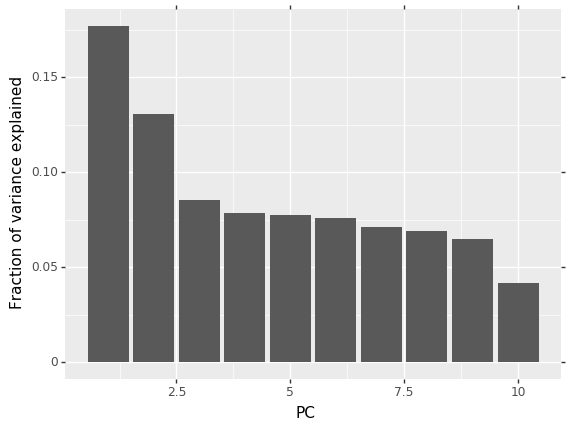

<ggplot: (-9223363268939576281)>

In [97]:
from sklearn.decomposition import PCA as sklearnPCA
#Note: we will scale our RNA-seq data to have a mean of 0 and a variance of 1. By making sure all sample values 
# are on the same scale, our PCA plot will provide a more informative visualization. 
rnaseq_scaled = preprocessing.scale(rnaseq)
#use the rnaseq_scaled variable as input for your PCA 

#store your PCA analysis output in a variable called PCA_results 


## BEGIN SOLUTION ##
#We decompose the data into 10 principal components 
sklearn_pca = sklearnPCA(n_components=10)
from sklearn import preprocessing
pca_results = sklearn_pca.fit_transform(rnaseq_scaled.transpose())
y=sklearn_pca.explained_variance_ratio_
x=range(1,len(y)+1)
print(sklearn_pca.explained_variance_ratio_)
qplot(x=x,
      y=y,
      geom="bar",
      stat="identity",
      xlab="PC",
      ylab="Fraction of variance explained")

## END SOLUTION ## 

### 3g) ### 
Generate a scatterplot of PC1 vs PC2. Color the scatterplot by the System column from "mm9.rnaseq.metadata.tsv".

/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine-0.4.0-py3.7.egg/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: 
The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine-0.4.0-py3.7.egg/plotnine/scales/scale.py:99: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/users/annashch/miniconda3/lib/python3.7/copy.py:274: MatplotlibDeprecationWarning: 
The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine-0.4.0-py3.7.egg/plotnine/facets/facet.py:151: MatplotlibDeprecationWarning: 
The Bunch class was depr

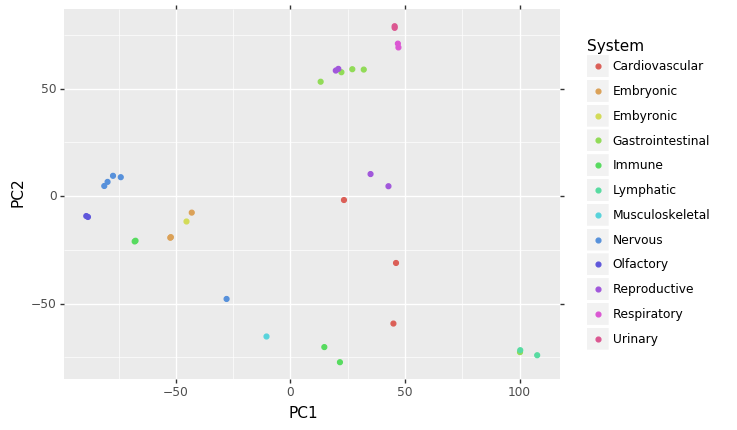

<ggplot: (8767915152953)>

In [98]:
## BEGIN SOLUTION ## 
metadata=pd.read_table("data/mm9.rnaseq.metadata.tsv",header=0,sep='\t',index_col=0)

x=pca_results[:,0]
y=pca_results[:,1]
qplot(x=x,
      y=y,
      geom="point",
      xlab="PC1",
      ylab="PC2",
      
      color=list(metadata['System']))+scale_color_discrete(name="System")
## END SOLUTION ## 

### 3h) ### 
We will overlay sample1 and sample2 on the PCA to determine which organ systems these samples cluster closest too. 

In [106]:
sample1_row_index=metadata.index.get_loc(sample1)
sample1_pcs=pca_results[sample1_row_index,0:2]

In [107]:
sample2_row_index=metadata.index.get_loc(sample2)
sample2_pcs=pca_results[sample2_row_index,0:2]

Based on the values in sample1_pcs and sample2_pcs, which organ systems do these samples cluster with? 

### BEGIN SOLUTION ### 
sample1 - musculoskeltal 

sample2 - nervous 
### END SOLUTION ### 